In [1]:
import sys; sys.path.insert(0, '../'); sys.path.insert(0, 'analysis_notes/mupClassification/'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
%matplotlib inline

versions:
{   'OffBeam': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'OnBeam': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'data date': '2018_05_11',
    'date': '2018_05_11',
    'overlay date': '2018_05_11'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.0512441465374 = N(POT on beam)/N(POT MC)


In [2]:
versions['overlay date'] = '2018_08_01'
versions['Overlay'] = 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'
OverlaySamples = load_samples(date=versions['overlay date'],filename=versions['Overlay']+'_'+versions['overlay date']+'_vertices')

285038 ccqe candidate pairs, 187286 in FV
49951 are 1mu-1p, 26.7%
41680 are other pairs, 22.3%
95655 are cosmic, 51.1%
--------------------------------------------------------------
24119 are CC 1p 0pi, 12.9%
--------------------------------------------------------------
26927 are CC 1p, 14.4%
I finished loading overlay samples. We have in total 285038 pairs


In [3]:
cuts_order  = ['no cut','Chi2Proton','Nflashes','MatchedFlash'
               ,'length','non-collinearity','vertex activity'
               ,'delta phi','Pt & delta phi']

cutlabels = ['preselection','$dE/dx$ profile',r'$N_{flashes}>0$','optical filter'
             ,'track lengths','non-collinearity','vertex activity'
             ,'coplanarity','$p_t<0.35$ GeV/c']
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples
                                                                   ,cuts_order=cuts_order)
pureffOverlay

,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi,CC 1p
no cut,100.0%,26.7%,100.0%,12.9%,no cut,100.0% (49951),100.0% (41680),100.0% (95655),100.0% (24119),100.0% (26927)
Chi2Proton,63.2%,70.7%,68.7%,37.1%,Chi2Proton,63.2% (31548),19.3% (8051),5.3% (5029),68.7% (16567),67.6% (18214)
Nflashes,62.9%,72.6%,68.4%,38.1%,Nflashes,62.9% (31404),19.2% (8010),4.0% (3841),68.4% (16492),67.4% (18136)
MatchedFlash,49.1%,78.7%,53.5%,41.5%,MatchedFlash,49.1% (24509),12.5% (5221),1.5% (1395),53.5% (12912),53.0% (14266)
length,44.9%,84.0%,49.9%,45.1%,length,44.9% (22437),7.5% (3130),1.2% (1129),49.9% (12042),49.0% (13190)
non-collinearity,41.0%,87.7%,47.3%,48.8%,non-collinearity,41.0% (20492),5.5% (2299),0.6% (568),47.3% (11404),46.0% (12399)
vertex activity,29.5%,89.4%,42.1%,61.5%,vertex activity,29.5% (14732),3.5% (1472),0.3% (283),42.1% (10146),39.7% (10696)
delta phi,19.6%,95.4%,32.0%,75.1%,delta phi,19.6% (9802),0.9% (371),0.1% (105),32.0% (7720),29.7% (7995)
Pt & delta phi,17.3%,96.3%,28.9%,77.7%,Pt & delta phi,17.3% (8647),0.6% (263),0.1% (68),28.9% (6979),26.9% (7231)


# reconstruction of the kinematics

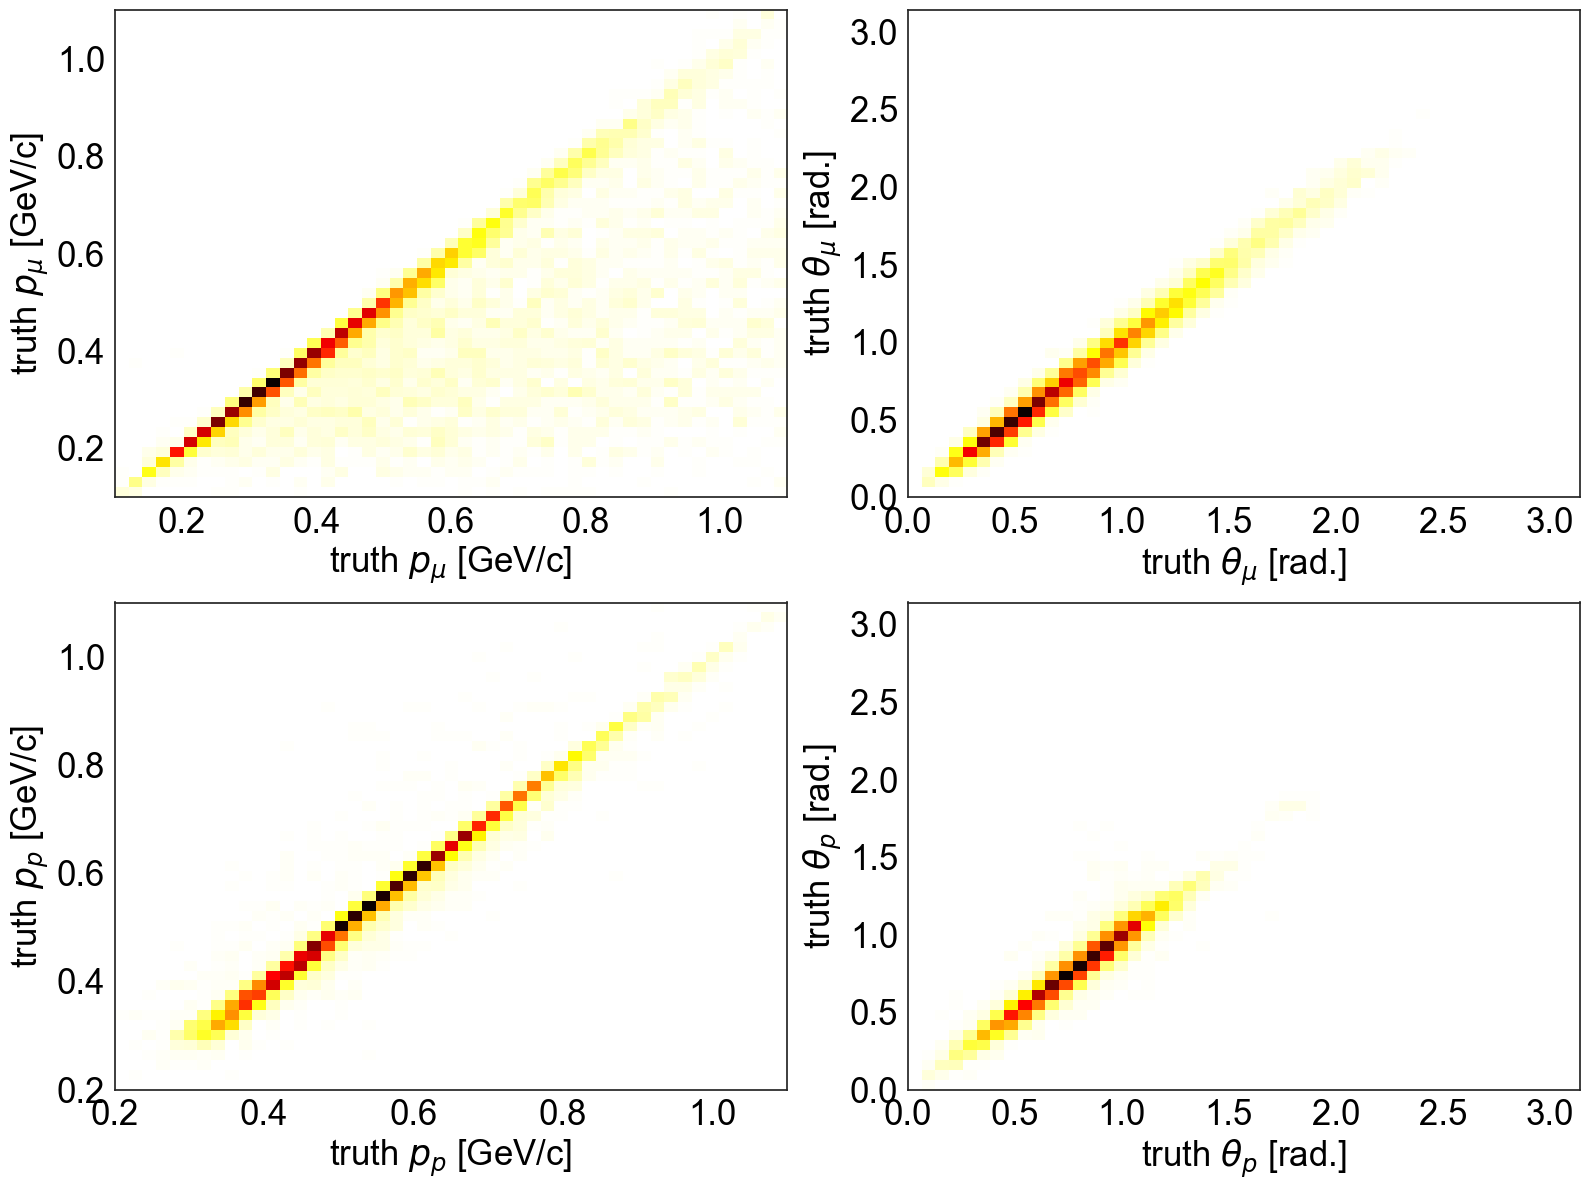

In [12]:
sam = reducedOverlay['Pt & delta phi']['1mu-1p']
fig=plt.figure(figsize=(16,12))
for iax,(var,label,bins) in enumerate(zip(['Pmu','Pmu_theta','Pp','Pp_theta']
                                        ,[r'$p_\mu$ [GeV/c]',r'$\theta_\mu$ [rad.]',r'$p_p$ [GeV/c]',r'$\theta_p$ [rad.]']
                                        ,[linspace(0.1,1.1,50),linspace(0,np.pi,50),linspace(0.2,1.1,50),linspace(0,np.pi,50,50)])):
    ax=fig.add_subplot(2,2,1+iax)        
    plot_2d_hist(sam['truth_'+var],sam['reco_'+var],bins=bins
             ,xlabel=r'truth '+label,ylabel=r'truth '+label,ax=ax);
plt.tight_layout()